In [29]:
import json
import csv
import pandas as pd
from pandas import DataFrame, Series
import dateutil.parser
from dateutil.tz import gettz
import datetime
import pytz
from functools import reduce
import time
from sklearn.model_selection import train_test_split
from sklearn import linear_model

%matplotlib inline

In [30]:
tone_names = ['Sadness', 'Analytical', 'Joy', 'Fear', 'Tentative', 'Anger', 'Confident']

In [31]:
#keylogger DF

# local_tz = gettz('America/New_York')

# def utc_to_local(utc_dt):
#     return utc_dt.replace(tzinfo=local_tz)

# def roundTime(dt):
#     dt = dt - datetime.timedelta(minutes=dt.minute, seconds=dt.second, microseconds=dt.microsecond)
#     return dt

with open('../keylogger/logs/log_new.json', 'r') as f:
    keyloggerData = json.load(f)

# tzinfos = { "EDT" : gettz("America/New_York") }

def extract_keyloggerData(data):
    keyloggerResults = []
    keystrokeWordCountResults = []

    for d in data:
#         result = [0]*(len(tone_names) + 6)
        keyloggerResult = [0] * (len(tone_names)+1)
        keystrokeWordCountResult = [0] * 6
        
        tones = d['document_tone']['tones']
        for i in range(len(tones)):
            score = tones[i]['score']
            tone_name = tones[i]['tone_name']
            tone_index = tone_names.index(tone_name)
            keyloggerResult[tone_index] = score            

        keyloggerResult[-1] = d['unix_time']

        keyloggerResults.append(tuple(keyloggerResult))
        
        try:
            keystrokeWordCountResult[0] = d['word_count']
            keystrokeWordCountResult[1] = d['uniqueword_ratio']
            keystrokeWordCountResult[2] = d['backspace_count']
            keystrokeWordCountResult[3] = d['avg_dwelltime']
            keystrokeWordCountResult[4] = d['avg_flighttime']
            keystrokeWordCountResult[5] = d['unix_time']
            
            keystrokeWordCountResults.append(tuple(keystrokeWordCountResult))
            
        except:
            continue
            
    return keyloggerResults, keystrokeWordCountResults

both = extract_keyloggerData(keyloggerData)

keyloggerDF = DataFrame(both[0],
                        columns=[tone_name+"_score" for tone_name in tone_names] + ['time'])
keyloggerDF

,Sadness_score,Analytical_score,Joy_score,Fear_score,Tentative_score,Anger_score,Confident_score,time
0,0.000000,0.000000,0.638807,0.0,0.000000,0.000000,0.667008,1.520481e+09
1,0.000000,0.000000,0.535479,0.0,0.000000,0.000000,0.000000,1.520485e+09
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.520488e+09
3,0.000000,0.000000,0.594168,0.0,0.000000,0.000000,0.000000,1.520492e+09
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.780034,1.520517e+09
5,0.000000,0.000000,0.567961,0.0,0.000000,0.000000,0.000000,1.520624e+09
6,0.000000,0.000000,0.577478,0.0,0.000000,0.000000,0.000000,1.520628e+09
7,0.000000,0.000000,0.579676,0.0,0.000000,0.555240,0.000000,1.520665e+09
8,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.821033,1.520734e+09
9,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.878843,1.520737e+09


In [32]:
keystrokeWordCountDF = DataFrame(both[1],
                        columns=['word_count', 'uniqueword_ratio', 'backspace_count', 'avg_dwelltime', 'avg_flighttime', 'time'])
keystrokeWordCountDF

,word_count,uniqueword_ratio,backspace_count,avg_dwelltime,avg_flighttime,time
0,42,0.714286,4,0.087153,0.171138,1.527742e+09
1,45,0.911111,55,0.100966,0.208556,1.527969e+09
2,73,0.808219,70,0.139891,0.219618,1.527978e+09
3,16,0.687500,15,0.101219,0.311904,1.527981e+09
4,22,0.909091,49,0.089719,0.281055,1.527992e+09
5,34,0.911765,35,0.116004,0.298266,1.528007e+09
6,8,1.000000,12,0.114056,0.237108,1.528041e+09
7,10,1.000000,2,0.128212,0.281025,1.528053e+09
8,21,0.857143,63,0.077993,0.177798,1.528057e+09
9,100,0.610000,148,0.093515,0.197078,1.528060e+09


In [33]:
#mood reporter DF

responsesDF = pd.read_csv("../reporter/responses.tsv", sep='\t', header=0)

timeValues = responsesDF.unix_time.values

def roundUnixTime(timestamp):
    timestamp = timestamp - (timestamp % 3600)
    return timestamp

def convertTime(timestamp):
    timestamp = time.gmtime(timestamp)
    return timestamp

# for x in range(0, len(timeValues)):
#     timestamp = time.gmtime(timeValues[x])
#     print(timestamp)
#     timeValues[x] = timestamp

#     timeValues[x] = utc_to_local(datetime.datetime.fromtimestamp(timeValues[x]))
#     timeValues[x] = dateutil.parser.parse(timeValues[x] + " EDT", tzinfos=tzinfos)


# responsesData.time = timeValues
#responsesData.time = responsesData.time.apply(roundTime)

activity_names = list(set(list(map(lambda x: x.lower().strip(), reduce(lambda x,y: x+y, [x.split(",") for x in list(responsesDF.activity.values)])))))

for activity_name in activity_names:
    responsesDF[activity_name.replace(" ", "_") + "_activity"] = responsesDF.activity.apply(lambda x: activity_name in x.lower())

location_names = list(set(list(map(lambda x: x.lower().strip(), reduce(lambda x,y: x+y, [x.split(",") for x in list(responsesDF.location.values)])))))

def split_locations(locations):
    return list(map(lambda x: x.lower().strip(), locations.split(",")))

for location_name in location_names:
    responsesDF[location_name.replace(" ", "_") + "_location"] = responsesDF.location.apply(lambda x: location_name in split_locations(x))

# responsesDF.time = responsesDF.unix_time.apply(roundUnixTime)
# responsesDF.time = responsesDF.time.apply(convertTime)
responsesDF.time = responsesDF.unix_time

del responsesDF['moodNotes']
del responsesDF['trigger']
del responsesDF['activity']
del responsesDF['location']
del responsesDF['unix_time']


outputsDF = responsesDF[['time','mood', 'morale', 'stress', 'unique_interactions', 'fatigue', 'compulsions', 'alone']].copy()

def convertUTCToTimestamp(timestamp):
    nanosecondTimestamp = timestamp * 1e9
    timestamp = pd.Timestamp(nanosecondTimestamp, tz='US/Eastern')
    return timestamp

outputsDF.time = outputsDF.time.apply(convertUTCToTimestamp)

In [41]:
test = outputsDF['mood'].rolling(25).mean()
test

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24     3.40
25     3.32
26     3.24
27     3.20
28     3.20
29     3.20
       ... 
855    3.32
856    3.30
857    3.26
858    3.26
859    3.22
860    3.22
861    3.18
862    3.16
863    3.08
864    3.08
865    3.12
866    3.14
867    3.14
868    3.12
869    3.12
870    3.18
871    3.20
872    3.26
873    3.30
874    3.34
875    3.32
876    3.26
877    3.22
878    3.20
879    3.22
880    3.26
881    3.26
882    3.28
883    3.28
884    3.28
Name: mood, Length: 885, dtype: float64

In [34]:
keystrokeWordCountDF.time = keystrokeWordCountDF.time.apply(convertUTCToTimestamp)
keystrokeWordCountDF.sort_values('time', inplace=True)
keystrokeWordCountOuputsDF = pd.merge_asof(outputsDF, keystrokeWordCountDF, on='time', tolerance=pd.Timedelta('2 hours')).dropna()
keystrokeWordCountOuputsDF.reset_index(inplace=True)
del keystrokeWordCountOuputsDF['index']

# keystrokeWordCountOuputs2DF = pd.merge_asof(outputs2DF, keystrokeWordCountDF, on='time', tolerance=pd.Timedelta('2 hours')).dropna()
# keystrokeWordCountOuputs2DF.reset_index(inplace=True)
# del keystrokeWordCountOuputs2DF['index']

In [37]:
from sklearn.svm import SVR

y_mood = keystrokeWordCountOuputsDF["mood"]
y_morale = keystrokeWordCountOuputsDF["morale"]
y_stress = keystrokeWordCountOuputsDF["stress"]
y_social = keystrokeWordCountOuputsDF["unique_interactions"]
y_fatigue = keystrokeWordCountOuputsDF["fatigue"]
y_compulsions = keystrokeWordCountOuputsDF["compulsions"]
y_alone = keystrokeWordCountOuputsDF["alone"]

keystrokeWordCountFeaturesList = list(keystrokeWordCountDF.columns.drop('time'))
X_keystrokeWordCount = keystrokeWordCountOuputsDF[keystrokeWordCountFeaturesList]

# keystrokeWordCount-mood
X_keystrokeWordCount_train, X_keystrokeWordCount_test, y_mood_train, y_mood_test = train_test_split(
    X_keystrokeWordCount, y_mood, test_size=0.20, shuffle=False)

keystrokeWordCount_mood_LM = linear_model.LinearRegression()
keystrokeWordCount_mood_LM = keystrokeWordCount_mood_LM.fit(X_keystrokeWordCount_train, y_mood_train)

# keystrokeWordCount-morale
X_keystrokeWordCount_train, X_keystrokeWordCount_test, y_morale_train, y_morale_test = train_test_split(
    X_keystrokeWordCount, y_morale, test_size=0.20, shuffle=False)

keystrokeWordCount_morale_LM = linear_model.LinearRegression()
keystrokeWordCount_morale_LM = keystrokeWordCount_morale_LM.fit(X_keystrokeWordCount_train, y_morale_train)

# keystrokeWordCount-stress
X_keystrokeWordCount_train, X_keystrokeWordCount_test, y_stress_train, y_stress_test = train_test_split(
    X_keystrokeWordCount, y_stress, test_size=0.20, shuffle=False)

keystrokeWordCount_stress_LM = linear_model.LinearRegression()
keystrokeWordCount_stress_LM = keystrokeWordCount_stress_LM.fit(X_keystrokeWordCount_train, y_stress_train)

# keystrokeWordCount-social
X_keystrokeWordCount_train, X_keystrokeWordCount_test, y_social_train, y_social_test = train_test_split(
    X_keystrokeWordCount, y_social, test_size=0.20, shuffle=False)

keystrokeWordCount_social_LM = linear_model.LinearRegression()
keystrokeWordCount_social_LM = keystrokeWordCount_social_LM.fit(X_keystrokeWordCount_train, y_social_train)

# keystrokeWordCount-fatigue
X_keystrokeWordCount_train, X_keystrokeWordCount_test, y_fatigue_train, y_fatigue_test = train_test_split(
    X_keystrokeWordCount, y_fatigue, test_size=0.20, shuffle=False)

keystrokeWordCount_fatigue_LM = linear_model.LinearRegression()
keystrokeWordCount_fatigue_LM = keystrokeWordCount_fatigue_LM.fit(X_keystrokeWordCount_train, y_fatigue_train)

# keystrokeWordCount-compulsions
X_keystrokeWordCount_train, X_keystrokeWordCount_test, y_compulsions_train, y_compulsions_test = train_test_split(
    X_keystrokeWordCount, y_compulsions, test_size=0.20, shuffle=False)

keystrokeWordCount_compulsions_LM = linear_model.LinearRegression()
keystrokeWordCount_compulsions_LM = keystrokeWordCount_compulsions_LM.fit(X_keystrokeWordCount_train, y_compulsions_train)

# keystrokeWordCount-alone
X_keystrokeWordCount_train, X_keystrokeWordCount_test, y_alone_train, y_alone_test = train_test_split(
    X_keystrokeWordCount, y_alone, test_size=0.20, shuffle=False)

keystrokeWordCount_alone_LM = linear_model.LinearRegression()
keystrokeWordCount_alone_LM = keystrokeWordCount_alone_LM.fit(X_keystrokeWordCount_train, y_alone_train)

print(keystrokeWordCount_mood_LM.score(X_keystrokeWordCount_test, y_mood_test))
print(keystrokeWordCount_morale_LM.score(X_keystrokeWordCount_test, y_morale_test))
print(keystrokeWordCount_stress_LM.score(X_keystrokeWordCount_test, y_stress_test))
print(keystrokeWordCount_social_LM.score(X_keystrokeWordCount_test, y_social_test))
print(keystrokeWordCount_fatigue_LM.score(X_keystrokeWordCount_test, y_fatigue_test))
print(keystrokeWordCount_compulsions_LM.score(X_keystrokeWordCount_test, y_compulsions_test))
print(keystrokeWordCount_alone_LM.score(X_keystrokeWordCount_test, y_alone_test))

-0.296426747148
-0.250683447977
-0.236250389149
2.18004291108e-06
-0.478774415444
-0.0478803120478
-0.252004560175


In [22]:
X_keystrokeWordCount_train.describe()

,word_count,uniqueword_ratio,backspace_count,avg_dwelltime,avg_flighttime
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,79.673410,0.765761,131.135838,0.141177,0.273160
std,89.122715,0.149859,130.979461,0.517027,0.094618
min,5.000000,0.371245,2.000000,0.073420,0.139510
25%,23.000000,0.666667,49.250000,0.089882,0.204368
50%,48.500000,0.773864,99.000000,0.100993,0.251392
75%,103.000000,0.875000,171.000000,0.115500,0.325455
max,554.000000,1.000000,1298.000000,9.690075,0.869400


In [23]:
X_keystrokeWordCount_test.describe()

,word_count,uniqueword_ratio,backspace_count,avg_dwelltime,avg_flighttime
count,87.000000,87.000000,87.000000,87.000000,87.000000
mean,78.850575,0.748277,118.379310,11285.225878,0.261488
std,90.819592,0.200174,107.419114,105260.606645,0.090434
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.500000,0.670290,39.500000,0.088845,0.197759
50%,43.000000,0.805556,88.000000,0.099409,0.244074
75%,97.500000,0.858804,161.500000,0.113301,0.282383
max,558.000000,1.000000,500.000000,981805.681834,0.533761


In [15]:
keystrokeWordCount_mood_LM.coef_

array([ -1.76857006e-04,  -2.06223417e-01,   9.18835088e-04,
         1.13531737e-02,  -2.15304724e-01])

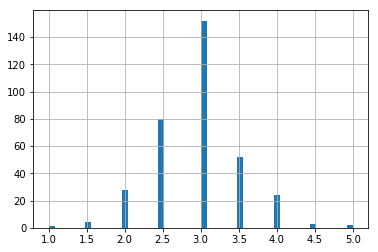

In [20]:
y_mood_train.hist(bins=50)

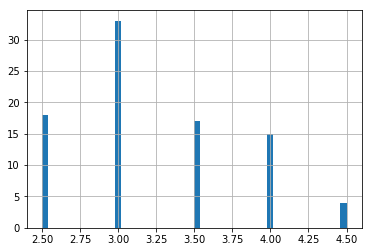

In [21]:
y_mood_test.hist(bins=50)

In [26]:
X_keystrokeWordCount_test.sort_values('avg_dwelltime', ascending=False).head()

,word_count,uniqueword_ratio,backspace_count,avg_dwelltime,avg_flighttime
401,67.0,0.850746,205.0,981805.681834,0.257988
372,34.0,0.882353,52.0,0.257842,0.274026
366,25.0,0.680000,94.0,0.238054,0.478678
399,0.0,0.000000,4.0,0.174967,0.527382
363,93.0,0.655914,106.0,0.160693,0.198769


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112325e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112947780>]], dtype=object)

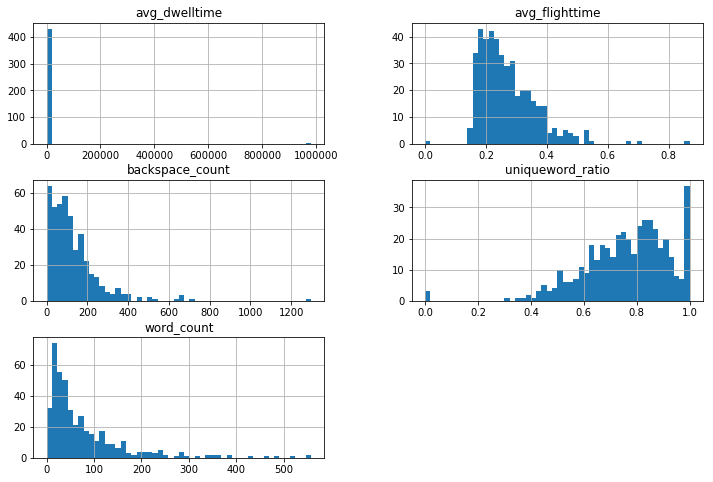

In [28]:
X_keystrokeWordCount.hist(bins=50, figsize=(12, 8))